# Download the dataset and supporting codes and pre-trained models

https://drive.google.com/file/d/1D3m6I2S8xIvdOHBkvwSSFof5OTJZCDSt/view?usp=drivesdk

https://drive.google.com/file/d/1CDRMyBA3Hk_gmbk1xkAm7aRHXBOQQigu/view?usp=drivesdk

https://drive.google.com/file/d/1so6AQ0_Pg255COjAzEOOVPlDzTJFVQro/view?usp=drivesdk

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
cd /content/drive/MyDrive/CIS680-VAE-GANs

/content/drive/MyDrive/CIS680-VAE-GANs


In [ ]:
!pip install torchvision==0.10.1
!pip install torch==1.9.1 

# CycleGAN training (TODO)

In [2]:
import torch
import pdb

D_A = torch.load('test_case/D_A.pt')
D_B = torch.load('test_case/D_B.pt')
G_BA = torch.load('test_case/G_BA.pt')
G_AB = torch.load('test_case/G_AB.pt')
valid = torch.load('test_case/valid.pt')
fake = torch.load('test_case/fake.pt')
fake_A = torch.load('test_case/fake_A.pt')
fake_B = torch.load('test_case/fake_B.pt')
real_A = torch.load('test_case/real_A.pt')
real_B = torch.load('test_case/real_B.pt')
criterion_GAN = torch.load('test_case/criterion_GAN.pt')
criterion_cycle = torch.load('test_case/criterion_cycle.pt')



def loss_discriminator(fakefG, D, real2D, valid, fake, criterion_GAN):
    '''
    loss_discriminator function is applied to compute loss for discriminator D_A and D_B,
    For example, we want to compute loss for D_A. The loss is consisted of two parts: 
    D(real_A) and D(G(real_B)). We want to penalize the distance between D(real_A) part and 1 and 
    distance between D(G(real_B)) part and 0. 
    We will want to first compute discriminator loss given real_A and valid, which is all 1.
    Then we want to forward real_A through G_AB network to get fake image batch 
    and compute discriminator loss given fake batch and fake, which is all 0.
    Finall, add up these two loss as the total discriminator loss.
    '''

    loss_D = criterion_GAN(torch.squeeze(D(real2D)),valid) + \
              criterion_GAN(torch.squeeze(D(fakefG.detach())),fake)  
    return loss_D



def loss_generator(G, real2G, D, valid, criterion_GAN):
    '''
    loss_generator function is applied to compute loss for both generator G_AB and G_BA:
    For example, we want to compute the loss for G_AB.
    real2G will be the real image in domain A, then we map real2G into domain B to get fake B,
    then we compute the loss between D_B(fake_B) and valid, which is all 1.
    The fake_B image will also be one of the outputs, since we want to use it in the loss_cycle_consis.
    '''
    fake_o_G = G(real2G)
    loss_G = criterion_GAN(torch.squeeze(D_B(fake_o_G)),valid)
    return loss_G, fake_o_G



def loss_cycle_consis(G, fakefG, real, criterion_cycle):
    '''
    loss_cycle_consis function is applied to both cycle consistency loss:
    between recovered A and original A,
    between recovered B and original B.
    For example, we want to compute the cycle consistency loss between recovered A and original A.
    fake2G will be the generated image in domain B, then we map fake2G back into domain A to get recovered A,
    then we compute the loss between recovered A and original A
    '''
    
    loss_cycle = criterion_cycle(G(fakefG),real)   
    return loss_cycle


# # test case
test_loss_GAN_AB = torch.load('test_case/loss_GAN_AB.pt')
test_loss_cycle_A = torch.load('test_case/loss_cycle_A.pt')
test_loss_D_A = torch.load('test_case/loss_D_A.pt')
loss_GAN_AB, fake_B = loss_generator(G_AB, real_A, D_B, valid, criterion_GAN)
loss_cycle_A = loss_cycle_consis(G_BA, fake_B, real_A, criterion_cycle)
loss_D_A = loss_discriminator(fake_A, D_A, real_A, valid, fake, criterion_GAN)


print('test case loss_D_A:', test_loss_D_A.item())
print('computed loss_D_A:', loss_D_A.item())

print('test case test_loss_GAN_AB:', test_loss_GAN_AB.item())
print('computed test_loss_GAN_AB:', loss_GAN_AB.item())

print('test case loss_cycle_A:', test_loss_cycle_A.item())
print('computed loss_cycle_A:', loss_cycle_A.item())

test case loss_D_A: 3.1760239601135254
computed loss_D_A: 3.1760246753692627
test case test_loss_GAN_AB: 3.164881467819214
computed test_loss_GAN_AB: 3.164876937866211
test case loss_cycle_A: 0.6627261638641357
computed loss_cycle_A: 0.6627261638641357


/usr/local/lib/python3.8/dist-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([1, 1, 8, 8])) that is different to the input size (torch.Size([8, 8])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [5]:
from datasets import *
from models import *
train_img_dir = './edges2shoes/train/'
train_dataset = Edge2Shoe(train_img_dir)
train_loader = data.DataLoader(train_dataset, batch_size=1)
print('the length of training data:', len(train_dataset)) 

the length of training data: 19125


the length of training data: 19125


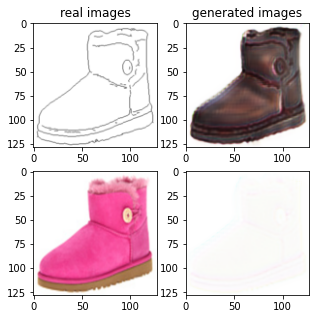

Train Epoch: 1 0% 	Total Loss: 6.223672 	Loss_G_AB: 2.320094	Loss_G_BA: 0.872928	Loss_cycle: 0.359545	Loss_D_A: 1.608220	Loss_D_B: 2.659397
0 9 T:  1.5992505550384521
Train Epoch: 1 0% 	Total Loss: 3.211393 	Loss_G_AB: 1.580173	Loss_G_BA: 0.659551	Loss_cycle: 0.279714	Loss_D_A: 0.309298	Loss_D_B: 1.502519
0 19 T:  1.0855627059936523
Train Epoch: 1 0% 	Total Loss: 1.783419 	Loss_G_AB: 0.723911	Loss_G_BA: 0.486458	Loss_cycle: 0.237359	Loss_D_A: 0.257192	Loss_D_B: 0.683684
0 29 T:  7.982452392578125
Train Epoch: 1 0% 	Total Loss: 1.266480 	Loss_G_AB: 0.424886	Loss_G_BA: 0.387150	Loss_cycle: 0.259869	Loss_D_A: 0.201908	Loss_D_B: 0.398685
0 39 T:  8.771798133850098
Train Epoch: 1 0% 	Total Loss: 1.198859 	Loss_G_AB: 0.406999	Loss_G_BA: 0.363115	Loss_cycle: 0.285706	Loss_D_A: 0.170330	Loss_D_B: 0.357766
0 49 T:  8.109130859375
Train Epoch: 1 0% 	Total Loss: 1.152545 	Loss_G_AB: 0.351829	Loss_G_BA: 0.381208	Loss_cycle: 0.324092	Loss_D_A: 0.165492	Loss_D_B: 0.296441
0 59 T:  8.038700819015503


KeyboardInterrupt: ignored

In [55]:
import warnings
warnings.filterwarnings("ignore")
from torch.autograd import Variable
from torch.utils import data
from torch.utils.data import DataLoader, TensorDataset
from torch import nn, optim
from datasets import *
from models import *
import argparse, os
import itertools
import torch
import time
import pdb
import matplotlib.pyplot as plt


# Training Configurations
# (You may put your needed configuration here. Please feel free to add more or use argparse. )
train_img_dir = './edges2shoes/train/'
img_shape = (3, 128, 128)
n_residual_blocks = 6
num_epochs = 2
batch_size = 1
lr_rate = 0.0002      # Adam optimizer learning rate
betas = (0.5, 0.999)  # Adam optimizer beta 1, beta 2
lambda_cyc = 10.0 	  # cycle loss weight
latent_dim = 8        # latent dimension for the encoded images from domain B
report_feq = 10        # Visualize image every 'report_feq' iters
visual_feq = 1000
save_feq = 1000      # Save models every 'save_feq' iters

# Random seeds (optional)
torch.manual_seed(1); np.random.seed(1)

# set device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Normalize image tensor
def norm(image):
    return (image/255.0-0.5)*2.0

# Denormalize image tensor
def denorm(tensor):
    return ((tensor+1.0)/2.0)*255.0

# train_dataset = Edge2Shoe(train_img_dir)
# train_loader = data.DataLoader(train_dataset, batch_size=batch_size)
print('the length of training data:', len(train_dataset))
# Losses
criterion_GAN = torch.nn.MSELoss()
criterion_cycle = torch.nn.L1Loss()

cuda = torch.cuda.is_available()

input_shape = img_shape

# Initialize generator and discriminator
G_AB = GeneratorResNet(input_shape, n_residual_blocks)
G_BA = GeneratorResNet(input_shape, n_residual_blocks)
D_A = Discriminator(input_shape)
D_B = Discriminator(input_shape)


if cuda:
    G_AB = G_AB.to(device)
    G_BA = G_BA.to(device)
    D_A = D_A.to(device)
    D_B = D_B.to(device)
    criterion_GAN.to(device)
    criterion_cycle.to(device)

# Initialize weights
G_AB.apply(weights_init_normal)
G_BA.apply(weights_init_normal)
D_A.apply(weights_init_normal)
D_B.apply(weights_init_normal)


# Define optimizer
optimizer_G = torch.optim.Adam(itertools.chain(G_AB.parameters(), G_BA.parameters()), lr=lr_rate, betas=betas)
optimizer_D_A = torch.optim.Adam(D_A.parameters(), lr=lr_rate, betas=betas)
optimizer_D_B = torch.optim.Adam(D_B.parameters(), lr=lr_rate, betas=betas)

# For adversarial loss
Tensor = torch.cuda.FloatTensor if cuda else torch.Tensor

# loss recorder
running_loss_D_A = 0
running_loss_D_B = 0
running_loss_GAN_AB = 0
running_loss_GAN_BA = 0
running_loss_cycle = 0
running_total_loss = 0

list_loss_D_A = []
list_loss_D_B = []
list_loss_GAN_AB = []
list_loss_GAN_BA = []
list_loss_cycle = []
list_total_loss = []

num_epochs = 1
# Training
total_steps = len(train_loader)*num_epochs; step = 0
for e in range(num_epochs):
    start = time.time()
    for idx, data in enumerate(train_loader):
        ########## Process Inputs ##########
        edge_tensor, rgb_tensor = data
        edge_tensor, rgb_tensor = norm(edge_tensor).to(device), norm(rgb_tensor).to(device)
        real_A = edge_tensor; real_B = rgb_tensor;

        # Adversarial ground truths
        valid = Variable(Tensor(np.ones((real_A.size(0), *D_A.output_shape))), requires_grad=False)
        fake = Variable(Tensor(np.zeros((real_A.size(0), *D_A.output_shape))), requires_grad=False)

        # ------------------
        #  Train Generators
        # ------------------
        G_AB.train(); G_BA.train()
        optimizer_G.zero_grad()

        # Generator loss
        loss_GAN_AB, fake_B = loss_generator(G_AB, real_A, D_B, valid, criterion_GAN)
        loss_GAN_BA, fake_A = loss_generator(G_BA, real_B, D_A, valid, criterion_GAN)
        loss_GAN = (loss_GAN_AB + loss_GAN_BA) / 2

        # Cycle loss
        loss_cycle_A = loss_cycle_consis(G_BA, fake_B, real_A, criterion_cycle)
        loss_cycle_B = loss_cycle_consis(G_AB, fake_A, real_B, criterion_cycle)
        loss_cycle = (loss_cycle_A + loss_cycle_B) / 2

        # Total loss
        loss_G = loss_GAN + lambda_cyc * loss_cycle

        loss_G.backward()
        optimizer_G.step()


        # -----------------------
        #  Train Discriminator A
        # -----------------------

        optimizer_D_A.zero_grad()

        # function to compute loss_D_A
        loss_D_A = loss_discriminator(fake_A, D_A, real_A, valid, fake, criterion_GAN)
        loss_D_A = loss_D_A / 2
        # update the D_A network
        loss_D_A.backward()
        optimizer_D_A.step()


        # -----------------------
        #  Train Discriminator B
        # -----------------------
        optimizer_D_B.zero_grad()

        # function to compute loss_D_A
        loss_D_B = loss_discriminator(fake_B, D_B, real_B, valid, fake, criterion_GAN)
        loss_D_B = loss_D_B / 2
        # update the D_B network
        loss_D_B.backward()
        optimizer_D_B.step()


        running_total_loss += (loss_GAN + lambda_cyc * loss_cycle + loss_D_A + loss_D_B).item()

        running_loss_GAN_AB += loss_GAN_AB.item()
        running_loss_GAN_BA += loss_GAN_BA.item()
        running_loss_D_A += loss_D_A.item()
        running_loss_D_B += loss_D_B.item()
        running_loss_cycle += lambda_cyc * loss_cycle.item()

        list_loss_D_A.append(loss_D_A.item())
        list_loss_D_B.append(loss_D_B.item())
        list_loss_GAN_AB.append(loss_GAN_AB.item())
        list_loss_GAN_BA.append(loss_GAN_BA.item())
        list_loss_cycle.append(lambda_cyc * loss_cycle.item())
        list_total_loss.append((loss_GAN + lambda_cyc * loss_cycle + loss_D_A + loss_D_B).item())

        ########## Visualization ##########
        if step % report_feq == report_feq-1:
            print('Train Epoch: {} {:.0f}% \tTotal Loss: {:.6f} \tLoss_G_AB: {:.6f}\tLoss_G_BA: {:.6f}\tLoss_cycle: {:.6f}\tLoss_D_A: {:.6f}\tLoss_D_B: {:.6f}'.format
                    (e+1, 100. * idx / len(train_loader), running_total_loss / report_feq, 
                    running_loss_GAN_AB/report_feq, running_loss_GAN_BA/report_feq, 
                    running_loss_cycle/report_feq, running_loss_D_A/report_feq, 
                    running_loss_D_B/report_feq))
            running_loss_D_A = 0
            running_loss_D_B = 0
            running_loss_GAN_AB = 0
            running_loss_GAN_BA = 0
            running_loss_cycle = 0
            running_total_loss = 0
            end = time.time()
            print(e, step, 'T: ', end-start)
            start = end
        ########## Visualize Generated images ##########
        if step % visual_feq == 0:
            vis_fake_A = denorm(fake_A[0].detach()).cpu().data.numpy().astype(np.uint8)
            vis_fake_B = denorm(fake_B[0].detach()).cpu().data.numpy().astype(np.uint8)
            vis_real_B = denorm(real_B[0].detach()).cpu().data.numpy().astype(np.uint8)
            vis_real_A = denorm(real_A[0].detach()).cpu().data.numpy().astype(np.uint8)
            fig, axs = plt.subplots(2,2, figsize = (5,5))	
            
            axs[0,0].imshow(vis_real_A.transpose(1,2,0))
            axs[0,0].set_title('real images')
            axs[0,1].imshow(vis_fake_B.transpose(1,2,0))
            axs[0,1].set_title('generated images')
            axs[1,0].imshow(vis_real_B.transpose(1,2,0))
            axs[1,1].imshow(vis_fake_A.transpose(1,2,0))
            plt.show()
        ########## Save Generators ##########
        if step % save_feq == save_feq-1:
            # if not os.path.exists('models'): os.mkdir('models')
            torch.save(G_AB, '/content/drive/MyDrive/CIS680-VAE-GANs/models/G_AB_f.pt')
            torch.save(G_BA, '/content/drive/MyDrive/CIS680-VAE-GANs/models/G_BA_f.pt')
            # feel free to save checkpoint if you need retrain the model...

        step += 1

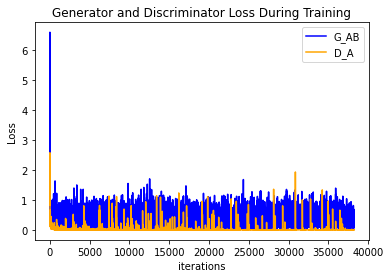

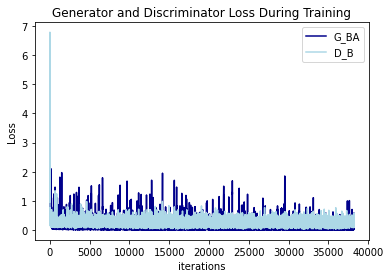

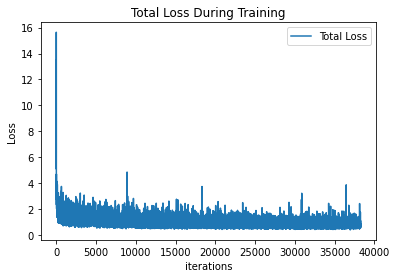

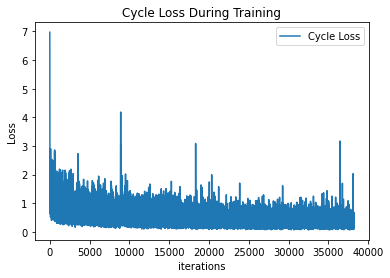

In [53]:
plt.plot(list_loss_GAN_AB,label="G_AB",color='b')
plt.plot(list_loss_D_A,label="D_A",color='orange')
plt.title("Generator and Discriminator Loss During Training")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.title("Generator and Discriminator Loss During Training")
plt.plot(list_loss_GAN_BA,label="G_BA",color='darkblue')
plt.plot(list_loss_D_B,label="D_B",color='lightblue')
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.title("Total Loss During Training")
plt.plot(list_total_loss,label="Total Loss")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.title("Cycle Loss During Training")
plt.plot(list_loss_cycle,label="Cycle Loss")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

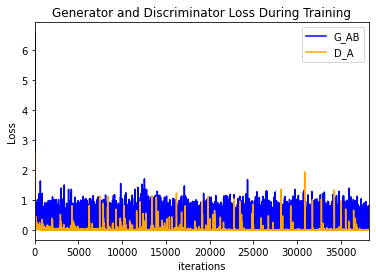

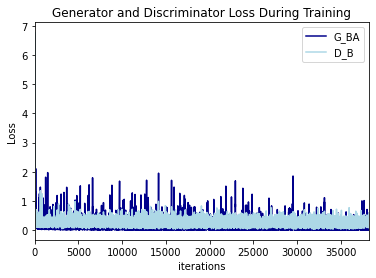

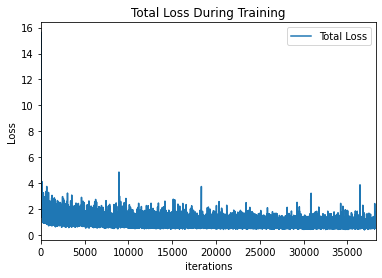

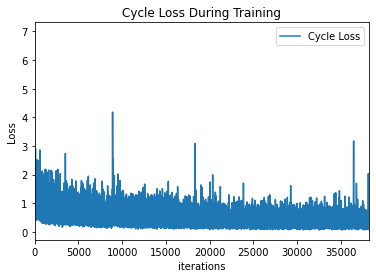

In [54]:

plt.plot(list_loss_GAN_AB,label="G_AB",color='b')
plt.plot(list_loss_D_A,label="D_A",color='orange')
plt.xlim(0,38250)
plt.title("Generator and Discriminator Loss During Training")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.title("Generator and Discriminator Loss During Training")
plt.plot(list_loss_GAN_BA,label="G_BA",color='darkblue')
plt.plot(list_loss_D_B,label="D_B",color='lightblue')
plt.xlim(0,38250)
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.title("Total Loss During Training")
plt.plot(list_total_loss,label="Total Loss")
plt.xlim(0,38250)
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.title("Cycle Loss During Training")
plt.plot(list_loss_cycle,label="Cycle Loss")
plt.xlim(0,38250)
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

# 

# CycleGAN testing (TODO)

In [80]:
from torch.utils.data import DataLoader, TensorDataset
test_batch_size = 1
test_img_dir = './edges2shoes/val/'
test_dataset = Edge2Shoe(test_img_dir)
test_loader = DataLoader(test_dataset, batch_size=test_batch_size)

In [57]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
G_AB = torch.load('/content/drive/MyDrive/CIS680-VAE-GANs/models/G_AB.pt')
G_BA = torch.load('/content/drive/MyDrive/CIS680-VAE-GANs/models/G_BA.pt')
if cuda:
    G_AB = G_AB.to(device)
    G_BA = G_BA.to(device)

In [ ]:
G_AB.eval()
G_BA.eval()
with torch.no_grad():
  c = 0
  for data in test_loader:
      edge_tensor, rgb_tensor = data
      edge_tensor, rgb_tensor = norm(edge_tensor).to(device), norm(rgb_tensor).to(device)
      real_A = edge_tensor; real_B = rgb_tensor;
      fake_B = G_AB(real_A)
      fake_A = G_BA(real_B)
      ################################
      # Please visualize real_edge, fake_shoe, real_shoe, fake_edge in 2-by-2 grids:
      vis_fake_A = denorm(fake_A[0].detach()).cpu().data.numpy().astype(np.uint8)
      vis_fake_B = denorm(fake_B[0].detach()).cpu().data.numpy().astype(np.uint8)
      vis_real_B = denorm(real_B[0].detach()).cpu().data.numpy().astype(np.uint8)
      vis_real_A = denorm(real_A[0].detach()).cpu().data.numpy().astype(np.uint8)
      fig, axs = plt.subplots(2,2, figsize = (5,5))	
      axs[0,0].imshow(vis_real_A.transpose(1,2,0))
      axs[0,0].set_title('real images')
      axs[0,1].imshow(vis_fake_B.transpose(1,2,0))
      axs[0,1].set_title('generated images')
      axs[1,0].imshow(vis_real_B.transpose(1,2,0))
      axs[1,1].imshow(vis_fake_A.transpose(1,2,0),cmap='gray')
      plt.show()
      ################################   
      c += 1
      if c == 20:
        break

# Quantitative Evaluation

## FID Score computation

First, we have to create 6 datasets:
- Domain A real set 1
- Domain A real set 2
- Domain A generate set

- Domain B real set 1
- Domain B real set 2
- Domain B generate set



Create folder to save images and create dataset.

In [30]:
! mkdir real_A_1 real_A_2 gen_A
! mkdir real_B_1 real_B_2 gen_B

In [31]:
# First create test data loader
from torch.utils.data import DataLoader, TensorDataset
from torchvision.utils import save_image
test_batch_size = 1
test_img_dir = './edges2shoes/val/'
test_dataset = Edge2Shoe(test_img_dir)
test_loader = DataLoader(test_dataset, batch_size=test_batch_size)

# indicate the device we will use
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Load learnt Generator G_AB and G_BA
# G_AB = torch.load('/content/models/G_AB.pt').to(device)
# G_BA = torch.load('/content/models/G_BA.pt').to(device)

# the size of dataset, we want to evaluate on
evaluate_num = 100

# make the gen data set and folder
real_A_set_1 = []
real_A_set_2 = []
real_B_set_1 = []
real_B_set_2 = []

gen_set_A = []
gen_set_B = []

for idx, data in enumerate(test_loader, 0):
    real_A, real_B = data
    # plt.imshow(real_A.type(torch.uint8).squeeze(0).cpu().permute(1,2,0))
    # plt.show()
    real_A, real_B = norm(real_A).to(device), norm(real_B).to(device)
    # plt.imshow(denorm(real_A).type(torch.uint8).squeeze(0).cpu().permute(1,2,0))
    # plt.imshow(denorm(real_A).squeeze(0).cpu().permute(1,2,0))
    # plt.show()
    # print(real_A.shape)
    
    if idx < evaluate_num:
        fake_A = G_BA(real_B)
        fake_B = G_AB(real_A)
        real_A_set_1.append(denorm(real_A.detach()))
        real_B_set_1.append(denorm(real_B.detach()))
        gen_set_A.append(denorm(fake_A.detach()))
        gen_set_B.append(denorm(fake_B.detach()))
        
        # plt.imshow(data[0].type(torch.uint8).squeeze(0).permute(1,2,0))
        # plt.imshow(denorm(real_A).squeeze(0).cpu().permute(1,2,0))
        # plt.imshow(denorm(real_A).type(torch.uint8).squeeze(0).cpu().permute(1,2,0))
        # plt.show()
        plt.imsave('./real_A_1/real_A' + str(idx) + '.png', denorm(real_A).type(torch.uint8).cpu().squeeze().permute(1,2,0).numpy())
        plt.imsave('./real_B_1/real_B' + str(idx) + '.png', denorm(real_B).type(torch.uint8).cpu().squeeze().permute(1,2,0).numpy())
        plt.imsave('./gen_A/gen_A' + str(idx) + '.png', denorm(fake_A).type(torch.uint8).cpu().squeeze().permute(1,2,0).numpy())
        plt.imsave('./gen_B/gen_B' + str(idx) + '.png', denorm(fake_B).type(torch.uint8).cpu().squeeze().permute(1,2,0).numpy())
        # save_image(denorm(real_A).type(torch.uint8).squeeze(), './real_A_1/real_A' + str(idx) + '.png', normalize=False)

        # save_image(denorm(real_B).detach().squeeze(), './real_B_1/real_B' + str(idx) + '.png', normalize=False)
        # save_image(denorm(fake_A).detach().squeeze(), './gen_A/gen_A' + str(idx) + '.png', normalize=False)
        # save_image(denorm(fake_B).detach().squeeze(), './gen_B/gen_B' + str(idx) + '.png', normalize=False)
        # del real_A; del real_B; del fake_A; del fake_B

    elif evaluate_num <= idx < 2*evaluate_num:
        real_A_set_2.append(real_A.detach())
        real_B_set_2.append(real_B.detach())
        plt.imsave('./real_A_2/real_A' + str(idx) + '.png', denorm(real_A).type(torch.uint8).cpu().squeeze().permute(1,2,0).numpy())
        plt.imsave('./real_B_2/real_B' + str(idx) + '.png', denorm(real_B).type(torch.uint8).cpu().squeeze().permute(1,2,0).numpy())
        # save_image(denorm(real_A).detach().squeeze(), './real_A_2/real_A' + str(idx) + '.png', normalize=False)
        # save_image(denorm(real_B).detach().squeeze(), './real_B_2/real_B' + str(idx) + '.png', normalize=False)
    
    if idx == 2*evaluate_num-1:
        break
# make 6 pytorch dataset
real_A_dataset_1 = TensorDataset(torch.cat(real_A_set_1))
real_A_dataset_2 = TensorDataset(torch.cat(real_A_set_2))
real_B_dataset_1 = TensorDataset(torch.cat(real_B_set_1))
real_B_dataset_2 = TensorDataset(torch.cat(real_B_set_2))
gen_dataset_A = TensorDataset(torch.cat(gen_set_A))
gen_dataset_B = TensorDataset(torch.cat(gen_set_B))



## Compute FID score

In [32]:
! pip install pytorch-fid

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pytorch-fid: filename=pytorch_fid-0.2.1-py3-none-any.whl size=14834 sha256=9059d931be0d691111e2a3f5b55a4f083298246a835ecbd5e2839d8ab329f381
  Stored in directory: /root/.cache/pip/wheels/df/c8/a0/cce2ed7671ae52be132ae836e429bba6148544f83b7962b4bc
Successfully built pytorch-fid


In [35]:
pwd

'/content/drive/MyDrive/CIS680-VAE-GANs'

In [36]:
print('computing FID score between real_edge_1 and real_edge_2')
! python -m pytorch_fid '/content/drive/MyDrive/CIS680-VAE-GANs/real_A_1' '/content/drive/MyDrive/CIS680-VAE-GANs/real_A_2' 

print('computing FID score between real_edge_1 and gen_edge')
! python -m pytorch_fid '/content/drive/MyDrive/CIS680-VAE-GANs/real_A_1' '/content/drive/MyDrive/CIS680-VAE-GANs/gen_A' 

print('computing FID score between real_shoe_1 and real_shoe_2')
! python -m pytorch_fid '/content/drive/MyDrive/CIS680-VAE-GANs/real_B_1' '/content/drive/MyDrive/CIS680-VAE-GANs/real_B_2' 

print('computing FID score between real_shoe_1 and gen_shoe')
! python -m pytorch_fid '/content/drive/MyDrive/CIS680-VAE-GANs/real_B_1' '/content/drive/MyDrive/CIS680-VAE-GANs/gen_B' 

computing FID score between real_edge_1 and real_edge_2
Downloading: "https://github.com/mseitzer/pytorch-fid/releases/download/fid_weights/pt_inception-2015-12-05-6726825d.pth" to /root/.cache/torch/hub/checkpoints/pt_inception-2015-12-05-6726825d.pth
100% 91.2M/91.2M [00:11<00:00, 8.06MB/s]
100% 2/2 [00:00<00:00,  2.45it/s]
100% 2/2 [00:00<00:00,  2.80it/s]
FID:  50.28807868650463
computing FID score between real_edge_1 and gen_edge
100% 2/2 [00:00<00:00,  2.51it/s]
100% 2/2 [00:00<00:00,  2.69it/s]
FID:  204.71508670124132
computing FID score between real_shoe_1 and real_shoe_2
100% 2/2 [00:00<00:00,  2.50it/s]
100% 2/2 [00:00<00:00,  2.69it/s]
FID:  58.22357219081903
computing FID score between real_shoe_1 and gen_shoe
100% 2/2 [00:00<00:00,  2.13it/s]
100% 2/2 [00:00<00:00,  2.55it/s]
FID:  119.92031691093607


## Compute IS score

In [34]:
from inception_score import inception_score
import warnings
warnings.filterwarnings("ignore")

print('IS score for real_edge_1 data set:')
print(inception_score(real_A_dataset_1, cuda=True, batch_size=64, resize=True, splits=1))
print('IS score for gen_edge data set:')
print(inception_score(gen_dataset_A, cuda=True, batch_size=64, resize=True, splits=1))


print('IS score for real_shoe_1:')
print(inception_score(real_B_dataset_1, cuda=True, batch_size=64, resize=True, splits=1))
print('IS score for gen_shoe data set:')
print(inception_score(gen_dataset_B, cuda=True, batch_size=64, resize=True, splits=1))

IS score for real_edge_1 data set:


Downloading: "https://download.pytorch.org/models/inception_v3_google-0cc3c7bd.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-0cc3c7bd.pth


  0%|          | 0.00/104M [00:00<?, ?B/s]

(1.0016575655876638, 0.0)
IS score for gen_edge data set:
(1.0003983814072201, 0.0)
IS score for real_shoe_1:
(3.7136724571598463, 0.0)
IS score for gen_shoe data set:
(2.9470629043427787, 0.0)
